In [5]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

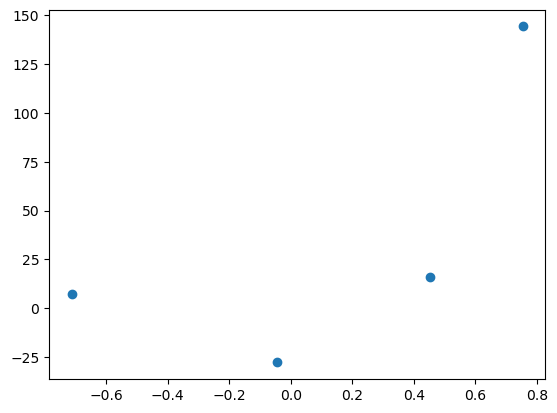

In [29]:
plt.scatter(X,y)
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [35]:
reg.coef_

array([78.35063668])

In [37]:
reg.intercept_

26.15963284313262

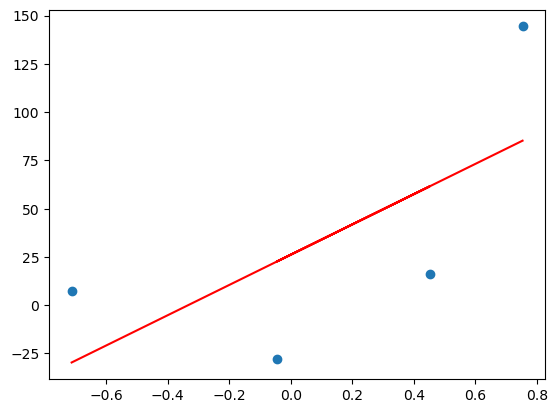

In [41]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')
plt.show()

# Apply Gradient Descent

In [44]:
# m = reg.coef_   (Fixed)
m = reg.coef_
b = 100
y_pred =(m*X + b).reshape(4)

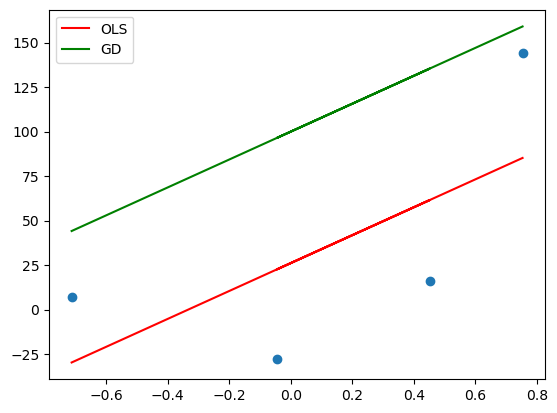

In [50]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label='GD')
plt.legend()
plt.show()

In [52]:
X.ravel()

array([-0.71239066,  0.45181234, -0.04450308,  0.75376638])

In [54]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [64]:
-2*np.sum(y - m*X.ravel() - b)

590.7229372549391

In [143]:
def GD_using_diff(X,y,m_original,b_original,b_guess = 100,lr = 0.01):
    plt.figure(figsize=(10,10))
    while (abs(b_original-b_guess) > 0.01):
        loss_slope = -2*np.sum(y.ravel() - X.ravel()*m_original - b_guess)
        step = loss_slope*lr
        b_guess = b_guess - step
        y_pred = m_original*X + b_guess
        plt.plot(X,y_pred,linestyle='dashed')
        
    plt.plot(X,reg.predict(X),linewidth=2,color='red')
    plt.scatter(X,y)
    plt.show()

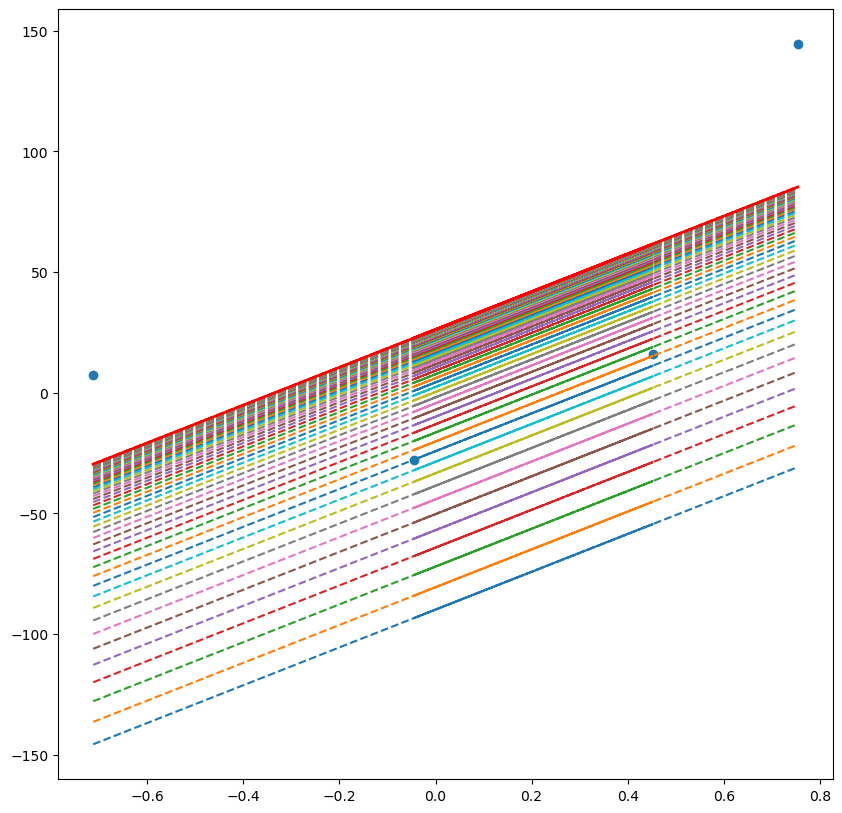

In [145]:
GD_using_diff(X,y,reg.coef_,reg.intercept_,-100)

In [147]:
def GD_using_epochs(X,y,m_original,b_original,b_guess=100,lr=0.01,epochs=10):
    plt.figure(figsize=(10,10))
    for i in range(epochs):
        loss_slope = -2* np.sum(y.ravel() - m_original*X.ravel() - b_guess)
        step = loss_slope*lr
        b_guess = b_guess - step
        y_pred = m_original*X + b_guess
        plt.plot(X,y_pred,linestyle='dashed')

    plt.plot(X,reg.predict(X),color='red',linewidth=2)
    plt.scatter(X,y)
    plt.show()

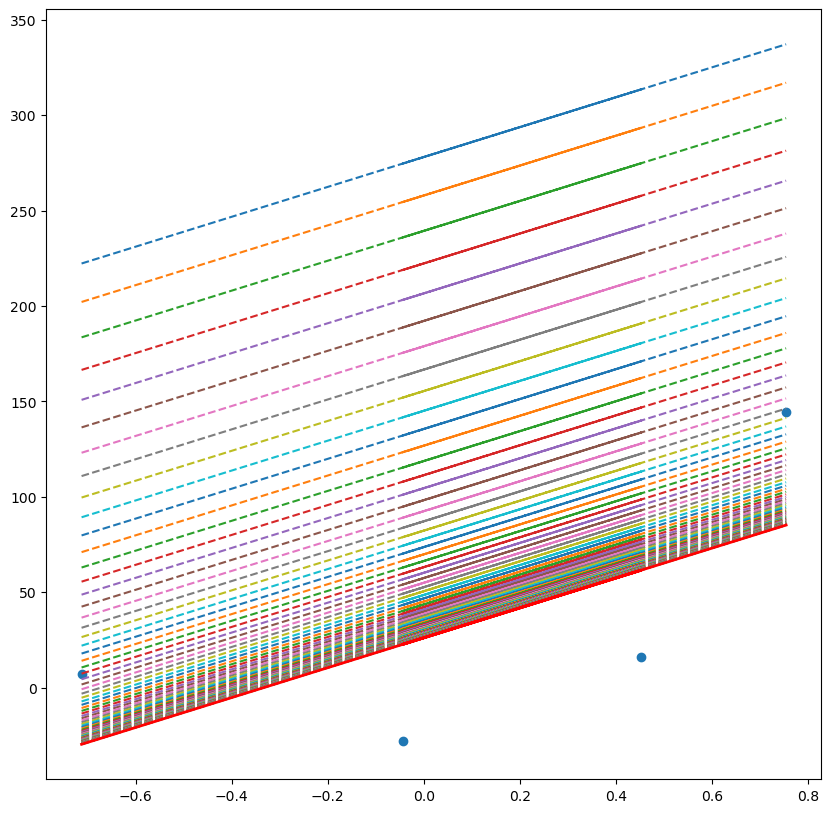

In [153]:
GD_using_epochs(X,y,reg.coef_,reg.intercept_,300,0.01,100)